# Come obiettivi ci sono quello di analizzare:
- Quali sono i fattori che influenzano i livelli di felicità
- Quali sono i primi 5 e gli ultimi 5 paesi per livelli di felicità
- Vedere i fattori che influenzano i primi 5 paesi per livelli di felicità
- Vedere i fattori che influenzano gli ultimi 5 paesi per livelli di felicità
- I diversi fattori che influenzano i livelli di felicità nei primi 5 paesi
- I diversi fattori che influenzano i livelli di felicità negli ultimi 5 paesi
- I livelli di felicità per area geografica
- Le prime 5 regioni per livelli di felicità
- Le ultime 5 regioni per livelli di felicità
- I fattori che influenzano i livelli di felicità in percentuali
- Stati con il maggior livello di libertà umana
- I livelli di libertà umana per aree geografiche
- Stati con il maggior livello di libertà economica
- I livelli di libertà economica per aree geografiche
- Stati con la maggior media felicità, libertà umana ed economica
- Variazione dei livelli di felicità dal 2015 al 2019
- Variazione dei fattori che influenzano i livelli di felicità dal 2015 al 2019
- Variazione della libertà umana dal 2015 al 2019
- Variazione della liberà economica dal 2015 al 2019

In [82]:
import os
from cProfile import label
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

### Selezione dei dati
dl = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\progetto\2015.csv")
dl_2016 = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\progetto\2016.csv")
dl_2017 = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\progetto\2017.csv")
dl_2018 = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\progetto\2018.csv")
dl_2019 = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\progetto\2019.csv")
dl2 = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\progetto\hfi_cc_2018.csv")
dl2_2017 = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\progetto\hfi_cc_2019.csv")
dl2_2018 = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\progetto\hfi_cc_2020.csv")
dl2_2019 = pd.read_csv(r"C:\Users\edoar\OneDrive\Desktop\progetto\hfi_cc_2021.csv")

In [83]:
### Pulizia dei dati
print(dl.isnull().values.any())
print(dl2.isnull().values.any())
column_means = dl_2018.mean()
dl_2018 = dl_2018.fillna(column_means)
column_means = dl2.mean()
dl2 = dl2.fillna(column_means)
column_means = dl2_2018.mean()
dl2_2018 = dl2_2018.fillna(column_means)
column_means = dl2_2019.mean()
dl2_2019 = dl2_2019.fillna(column_means)
dl_2017.rename(columns = {'Happiness.Score':'Happiness Score', 'Health..Life.Expectancy.':'Health Life Expectancy',"Economy..GDP.per.Capita.":"Economy (GDP pro Capita)","Trust..Government.Corruption.":"Trust Government Corruption","Dystopia.Residual":"Dystopia Residual"}, inplace = True)

False
True


C:\Users\edoar\AppData\Local\Temp\ipykernel_17416\2750727672.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\edoar\AppData\Local\Temp\ipykernel_17416\2750727672.py:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\edoar\AppData\Local\Temp\ipykernel_17416\2750727672.py:8: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\edoar\AppData\Local\Temp\ipykernel_17416\2750727672.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric

In [84]:
### Esplorazione dei dati
print(dl.head(10))
print(dl2.head(10))
print(dl.shape)

       Country                     Region  Happiness Rank  Happiness Score  \
0  Switzerland             Western Europe               1            7.587   
1      Iceland             Western Europe               2            7.561   
2      Denmark             Western Europe               3            7.527   
3       Norway             Western Europe               4            7.522   
4       Canada              North America               5            7.427   
5      Finland             Western Europe               6            7.406   
6  Netherlands             Western Europe               7            7.378   
7       Sweden             Western Europe               8            7.364   
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884            

In [85]:
dlc = dl.loc[0:5]
dln = dl2[dl2['year'] == 2015].index
dln_2016 = dl2[dl2['year'] == 2016].index
dln_2017 = dl2_2017[dl2_2017['year'] == 2017].index
dln_2018 = dl2_2019[dl2_2019['year'] == 2018].index
dln_2019 = dl2_2019[dl2_2019['year'] == 2019].index

In [86]:
### Trasformazione dei dati
dlf = dl2.iloc[162:323]
dlf_2016 = dl2.iloc[0:161]
dlf_2017 = dl2_2017.iloc[0:161]
dlf_2018 = dl2_2019.iloc[165:329]
dlf_2019 = dl2_2019.iloc[0:164]
percentuali = [17.23,18.55,12.55,8.33,1.86,5.69,35.71]
percentuali2 = [18.31,17.99,12.78,8.94,4.88,5.97,30.56]
percentuali3 = [17.60,18.07,11.62,8.62,6.42,4.53,33.11]
percentuali4 = [19.39,17.68,11.76,8.89,4.85,4.60,32.77]
percentuali5 = [18.33,17.79,12.18,8.50,4.42,6.16,32.50]
percentuali154 = [6.40,22.30,12.35,17.08,15.90,6.52,19.33]
percentuali155 = [8.55,10.57,9.54,14.45,2.33,5.44,49.70]
percentuali156 = [22.05,15.76,23.95,5.18,6.28,15.66,10.91]
percentuali157 = [0.50,14.28,7.67,4.06,3.44,6.78,63.09]
percentuali158 = [7.32,4.89,10.00,12.82,3.76,5.84,55.19]

In [87]:
sviz_m = 8.2171
nuovazel_m = 8.2142
australia_m = 7.9637
irland_m = 7.9451
hongkong_m = 7.5671
sta_m = [sviz_m,nuovazel_m,australia_m,irland_m,hongkong_m]
dla = dlf['ef_score']
dle = dlf['hf_score']
dla_2016 = dlf_2016['ef_score']
dle_2016 = dlf_2016['hf_score']
dla_2017 = dlf_2017['ef_score']
dle_2017 = dlf_2017['hf_score'].astype(float).nlargest(10)
dla_2018 = dlf_2018['ef_score'].nlargest(10)
dle_2018 = dlf_2018['hf_score']
dla_2019 = dlf_2019['ef_score'].nlargest(10)
dle_2019 = dlf_2019['hf_score']
stati_felici = dl2.iloc[[269, 225, 302, 232,167]]
print(stati_felici)
stati_felici_2016 = dl2.iloc[[107,140,63,5,27]]
stati_felici_2017 = dl2_2017.iloc[[107,140,64,27,5]]
stati_felici_2018 = dl2_2019.iloc[[308,274,207,170,213,217,238,307,193,256]]
stati_felici_2019 = dl2_2019.iloc[[143,109,42,48,73,28,52,5,142]]
liberta_economica = dl2.iloc[[225, 292, 269, 302,232]]
liberta_economica_2016 = dl2.iloc[[63,130,107,140,70]]
liberta_economica_2017 = dl2_2017.iloc[[64,131,107,140,155,71,154,27,5,96]]
liberta_economica_2018 = dl2_2019.iloc[[231,298,274,308,170,323,263,221,207,238]]
liberta_economica_2019 = dl2_2019.iloc[[66,133,109,143,56,158,73,90,5,42]]

     year ISO_code    countries          region  pf_rol_procedural  \
269  2015      NZL  New Zealand         Oceania           8.123283   
225  2015      HKG    Hong Kong       East Asia           7.637506   
302  2015      CHE  Switzerland  Western Europe           5.589355   
232  2015      IRL      Ireland  Western Europe           5.589355   
167  2015      AUS    Australia         Oceania           8.495798   

     pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  \
269      7.840253         7.506775  7.823437        9.605842   
225      7.724688         8.021516  7.794570        9.878549   
302      5.474770         5.044070  8.393829        9.725954   
232      5.474770         5.044070  8.106678        9.753197   
167      7.667774         7.518147  7.893906        9.603354   

     pf_ss_disappearances_disap  ...  ef_regulation_business_bribes  \
269                   10.000000  ...                       8.379835   
225                    8.341855  ...                

In [88]:
sviz = dl["Happiness Score"].iloc[0]
sviz2016 = dl_2016["Happiness Score"].iloc[1]
sviz2017 = dl_2017["Happiness Score"].iloc[4]
sviz2018 = dl_2018["Score"].iloc[4]
sviz2019 = dl_2019["Score"].iloc[5]
sviz_un = [sviz,sviz2016,sviz2017,sviz2018,sviz2019]
danimark = dl["Happiness Score"].iloc[2]
danimark2016= dl_2016["Happiness Score"].iloc[0]
danimark2017= dl_2017["Happiness Score"].iloc[1]
danimark2018= dl_2018["Score"].iloc[2]
danimark2019= dl_2019["Score"].iloc[1]
danimark_un = [danimark,danimark2016,danimark2017,danimark2018,danimark2019]
isl = dl["Happiness Score"].iloc[1]
isl2016 = dl_2016["Happiness Score"].iloc[2]
isl2017 = dl_2017["Happiness Score"].iloc[2]
isl2018 = dl_2018["Score"].iloc[1]
isl2019 = dl_2019["Score"].iloc[3]
isl_un = [isl,isl2016,isl2017,isl2018,isl2019]
norv = dl["Happiness Score"].iloc[3]
norv2016 = dl_2016["Happiness Score"].iloc[3]
norv2017 = dl_2017["Happiness Score"].iloc[0]
norv2018 = dl_2018["Score"].iloc[1]
norv2019 = dl_2019["Score"].iloc[2]
norv_un = [norv,norv2016,norv2017,norv2018,norv2019]
finl = dl["Happiness Score"].iloc[5]
finl2016 = dl_2016["Happiness Score"].iloc[4]
finl2017 = dl_2017["Happiness Score"].iloc[4]
finl2018 = dl_2018["Score"].iloc[0]
finl2019 = dl_2019["Score"].iloc[0]
finl_un = [finl,finl2016,finl2017,finl2018,finl2019]

In [89]:
nuova_zell = stati_felici["hf_score"].iloc[0]
nuova_zell2016 = stati_felici_2016["hf_score"].iloc[0]
nuova_zell2017 = stati_felici_2017["hf_score"].iloc[0]
nuova_zell2018 = stati_felici_2018["hf_score"].iloc[1]
nuova_zell2019 = stati_felici_2019["hf_score"].iloc[1]
nuova_zell_un = [nuova_zell, nuova_zell2016,nuova_zell2017,nuova_zell2018,nuova_zell2019]
hongkong = stati_felici["hf_score"].iloc[1]
hongkong2016 = stati_felici_2016["hf_score"].iloc[2]
hongkong2017 = stati_felici_2017["hf_score"].iloc[2]
hongkong_un = [hongkong, hongkong2016,hongkong2017]
svizz = stati_felici["hf_score"].iloc[2]
svizz2016 = stati_felici_2016["hf_score"].iloc[1]
svizz2017 = stati_felici_2017["hf_score"].iloc[1]
svizz2018 = stati_felici_2018["hf_score"].iloc[0]
svizz2019 = stati_felici_2019["hf_score"].iloc[0]
svizz_un = [svizz, svizz2016,svizz2017,svizz2018,svizz2019]
austr = stati_felici["hf_score"].iloc[4]
austr2016 = stati_felici_2016["hf_score"].iloc[3]
austr2017 = stati_felici_2017["hf_score"].iloc[4]
austr2018 = stati_felici_2018["hf_score"].iloc[3]
austr2019 = stati_felici_2019["hf_score"].iloc[7]
austr_un = [austr, austr2016,austr2017,austr2018,austr2019]
canad = dl2["hf_score"].iloc[189]
canad2016 = stati_felici_2016["hf_score"].iloc[4]
canad2017 = stati_felici_2017["hf_score"].iloc[3]
canad2018 = stati_felici_2018["hf_score"].iloc[9]
canad2019 = stati_felici_2019["hf_score"].iloc[5]
canad_un = [canad, canad2016,canad2017,canad2018,canad2019]

In [90]:
hongko = liberta_economica["ef_score"].iloc[0]
hongko2016 = liberta_economica_2016["ef_score"].iloc[0]
hongko2017 = liberta_economica_2017["ef_score"].iloc[0]
hongko2018 = liberta_economica_2018["ef_score"].iloc[0]
hongko2019 = liberta_economica_2019["ef_score"].iloc[0]
hongko_un = [hongko,hongko2016,hongko2017,hongko2018,hongko2019]
sing = liberta_economica["ef_score"].iloc[1]
sing2016 = liberta_economica_2016["ef_score"].iloc[1]
sing2017 = liberta_economica_2017["ef_score"].iloc[1]
sing2018 = liberta_economica_2018["ef_score"].iloc[1]
sing2019 = liberta_economica_2019["ef_score"].iloc[1]
sing_un = [sing,sing2016,sing2017,sing2018,sing2019]
nuova_ze = liberta_economica["ef_score"].iloc[2]
nuova_ze2016 = liberta_economica_2016["ef_score"].iloc[2]
nuova_ze2017 = liberta_economica_2017["ef_score"].iloc[2]
nuova_ze2018 = liberta_economica_2018["ef_score"].iloc[2]
nuova_ze2019 = liberta_economica_2019["ef_score"].iloc[2]
nuova_ze_un = [nuova_ze,nuova_ze2016,nuova_ze2017,nuova_ze2018,nuova_ze2019]
svi = liberta_economica["ef_score"].iloc[2]
svi2016 = liberta_economica_2016["ef_score"].iloc[3]
svi2017 = liberta_economica_2017["ef_score"].iloc[3]
svi2018 = liberta_economica_2018["ef_score"].iloc[3]
svi2019 = liberta_economica_2019["ef_score"].iloc[3]
svi_un = [svi,svi2016,svi2017,svi2018,svi2019]
irla = liberta_economica["ef_score"].iloc[2]
irla2016 = liberta_economica_2016["ef_score"].iloc[4]
irla2017 = liberta_economica_2017["ef_score"].iloc[5]
irla2018 = liberta_economica_2018["ef_score"].iloc[9]
irla2019 = liberta_economica_2019["ef_score"].iloc[6]
irla_un = [irla,irla2016,irla2017,irla2018,irla2019]

Text(0.5, 1.0, 'I fattori che influenzano i livelli di felicità')

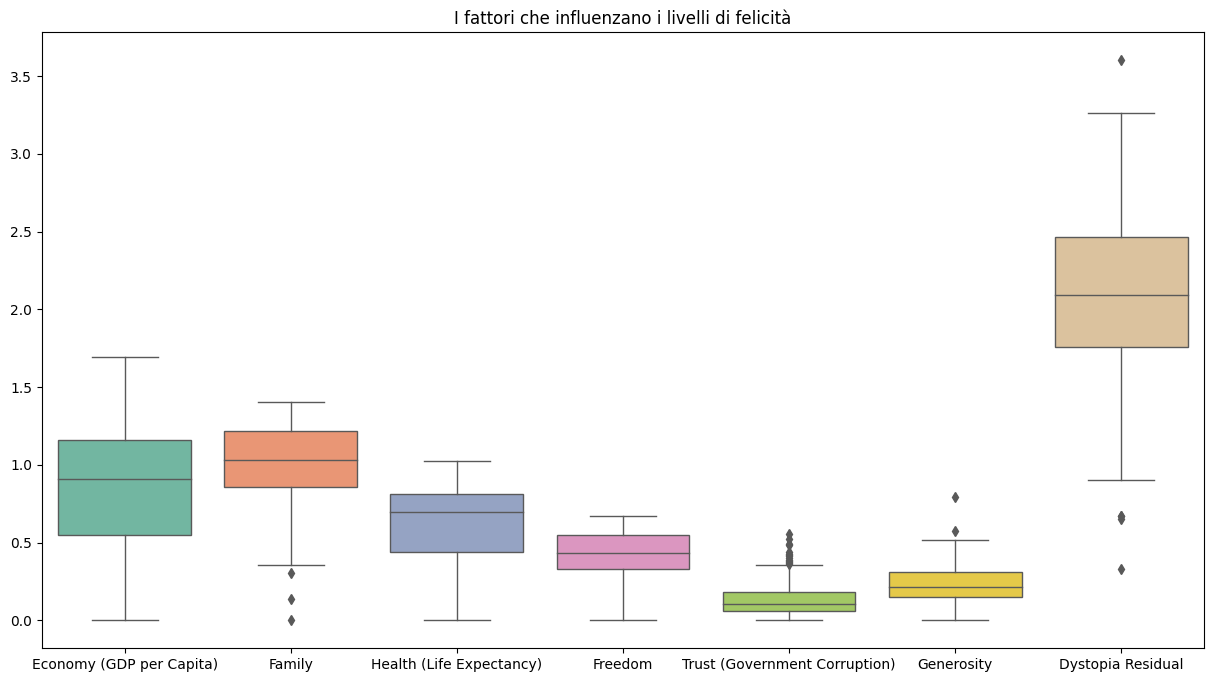

In [91]:
### Visualizzazione dei dati
plt.subplots(figsize=(15,8))
nomi = ["PIL pro capite","Famiglia","Aspettativa di vita","libertà","Corruzione del governo","Generosità","Distopia"]
boxplot_data= dl.drop(['Happiness Rank','Country', 'Happiness Score',"Region","Standard Error"],axis=1)
sns.boxplot(data=boxplot_data, linewidth=1, palette="Set2")
plt.title("I fattori che influenzano i livelli di felicità")

Text(0.5, 1.0, 'I 5 paesi più felici e i 5 meno felici')

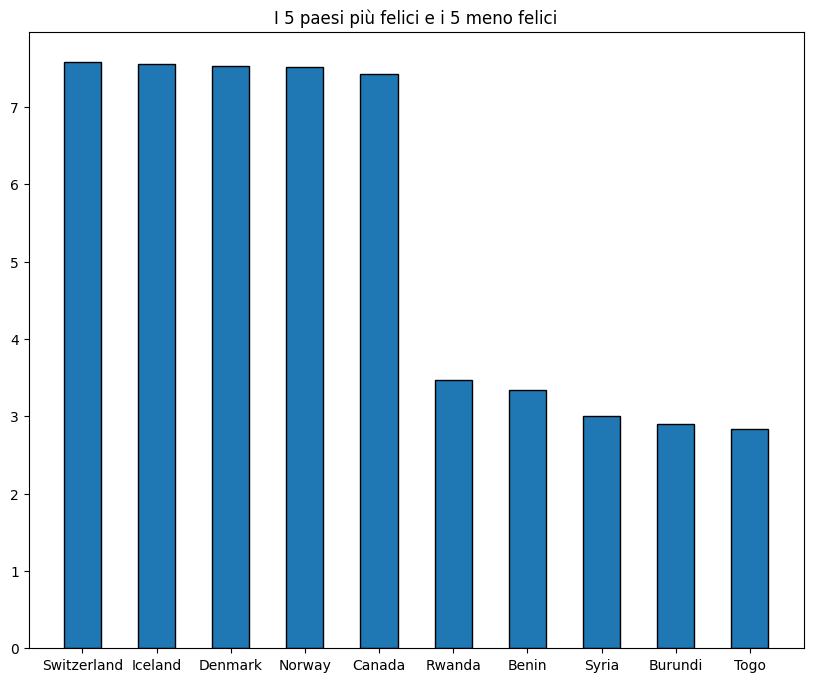

In [92]:
plt.subplots(figsize=(10,8))
top_5= dl[['Country','Happiness Score']].head(5)
bottom_5= dl[['Country','Happiness Score']].tail(5)
bar_plot_data= pd.concat([top_5, bottom_5], keys=['5 happiest countries','5 least happy countries'])
plt.bar(x="Country",height="Happiness Score",data= bar_plot_data,width=0.5, edgecolor='black')
plt.title("I 5 paesi più felici e i 5 meno felici")

Text(0.5, 1.0, 'I fattori che influenzano i primi 5 paesi per felicità')

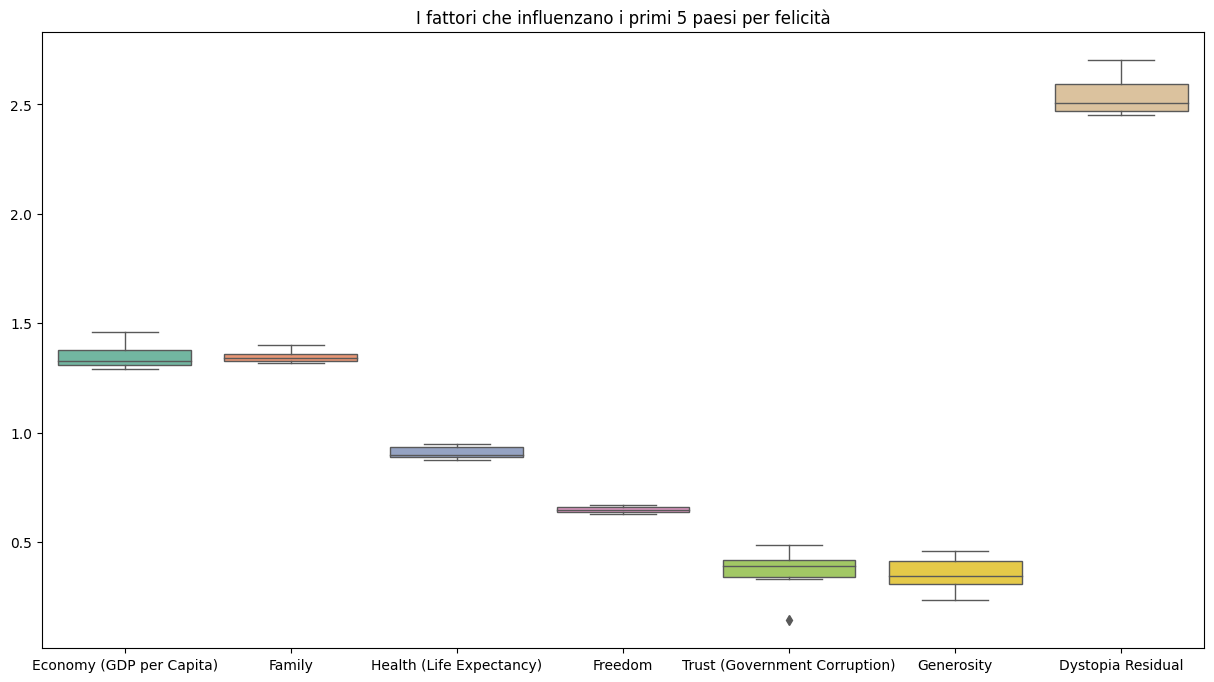

In [93]:
plt.subplots(figsize=(15,8))
boxplot_data= dlc.drop(['Happiness Rank','Country', 'Happiness Score',"Region","Standard Error"],axis=1)
sns.boxplot(data=boxplot_data, linewidth=1, palette="Set2")
plt.title("I fattori che influenzano i primi 5 paesi per felicità")

Text(0.5, 1.0, 'I fattori che influenzano gli ultimi 5 paesi per felicità')

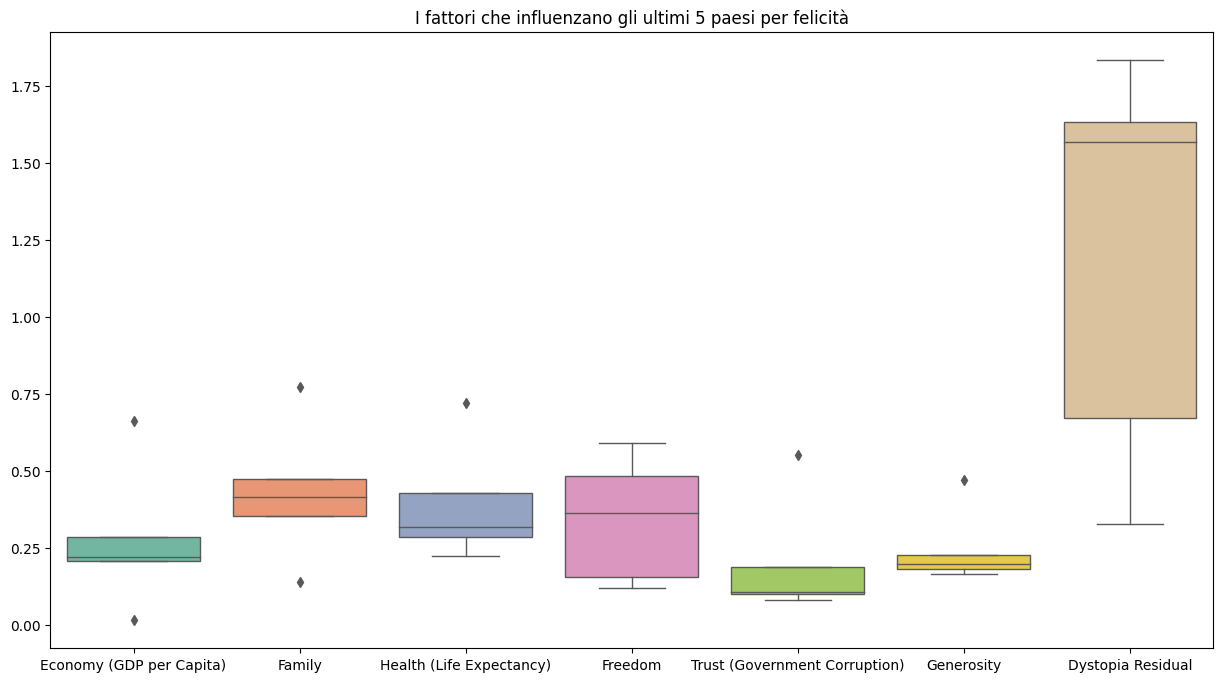

In [94]:
plt.subplots(figsize=(15,8))
boxplot_data= dl.tail(5).drop(['Happiness Rank','Country', 'Happiness Score',"Region","Standard Error"],axis=1)
sns.boxplot(data=boxplot_data, linewidth=1, palette="Set2")
plt.title("I fattori che influenzano gli ultimi 5 paesi per felicità")

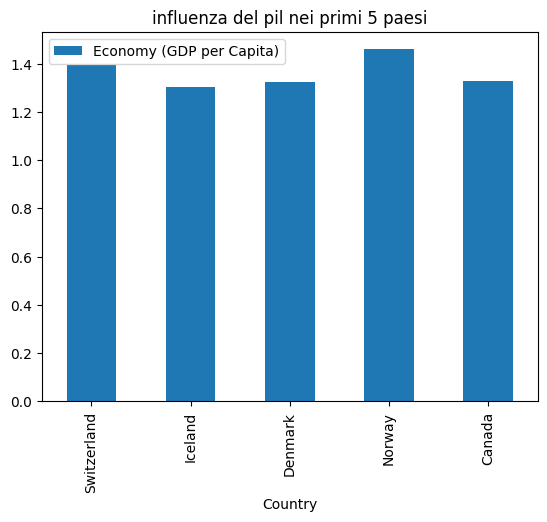

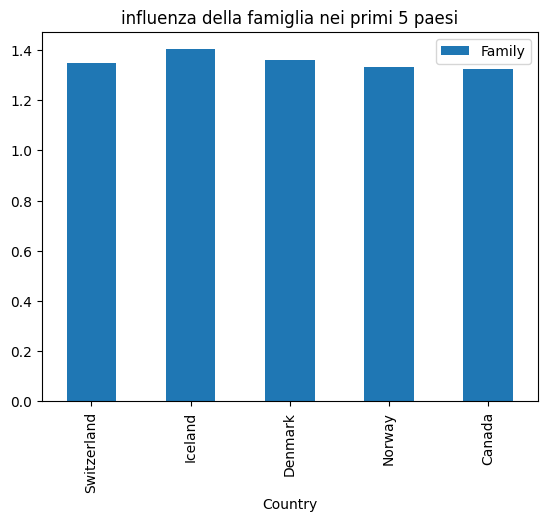

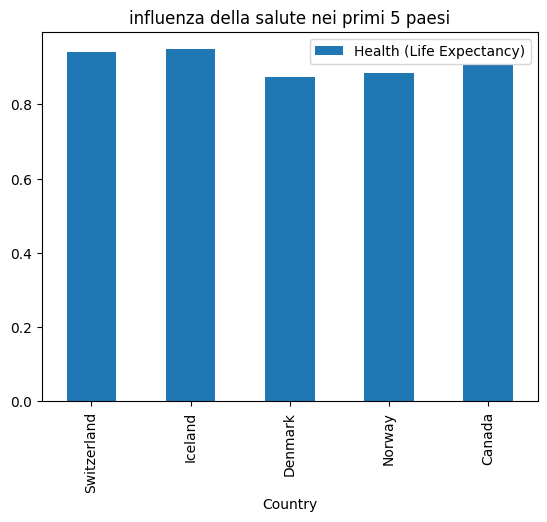

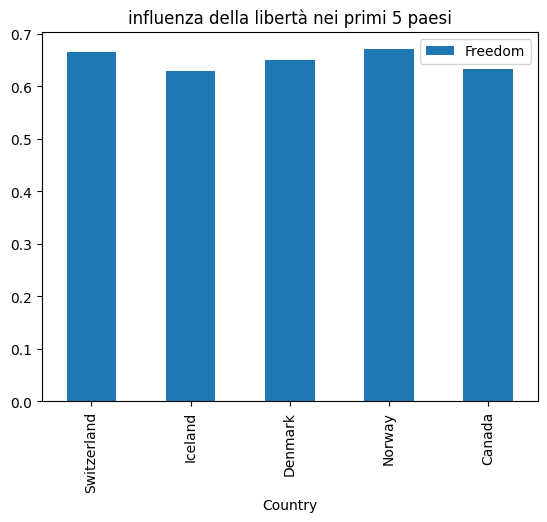

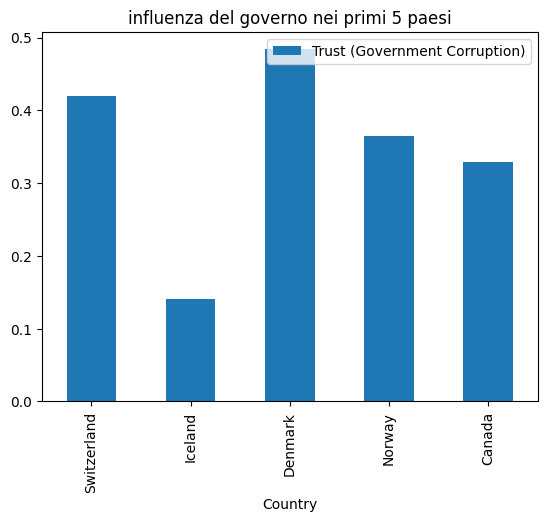

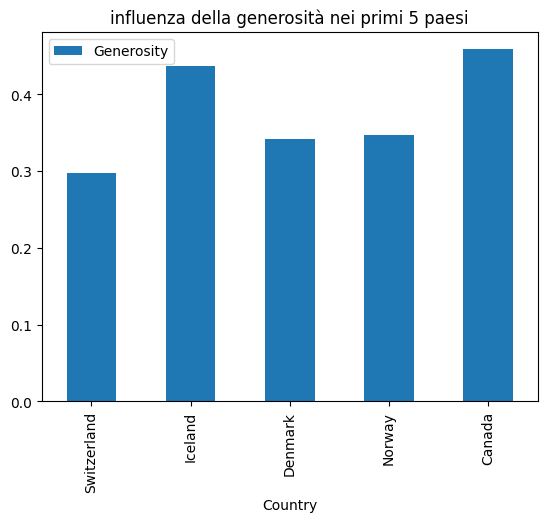

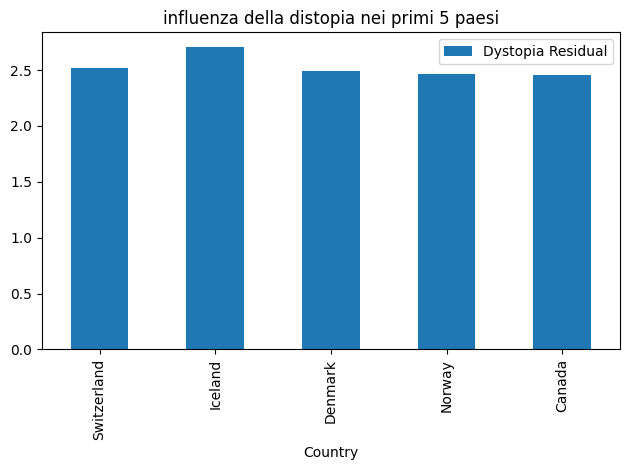

In [95]:
dl.head(5).plot(x="Country", y="Economy (GDP per Capita)", kind="bar")
plt.title("influenza del pil nei primi 5 paesi")
dl.head(5).plot(x="Country", y="Family", kind="bar")
plt.title("influenza della famiglia nei primi 5 paesi")
dl.head(5).plot(x="Country", y="Health (Life Expectancy)", kind="bar")
plt.title("influenza della salute nei primi 5 paesi")
dl.head(5).plot(x="Country", y="Freedom", kind="bar")
plt.title("influenza della libertà nei primi 5 paesi")
dl.head(5).plot(x="Country", y="Trust (Government Corruption)", kind="bar")
plt.title("influenza del governo nei primi 5 paesi")
dl.head(5).plot(x="Country", y="Generosity", kind="bar")
plt.title("influenza della generosità nei primi 5 paesi")
dl.head(5).plot(x="Country", y="Dystopia Residual", kind="bar")
plt.title("influenza della distopia nei primi 5 paesi")
plt.tight_layout()

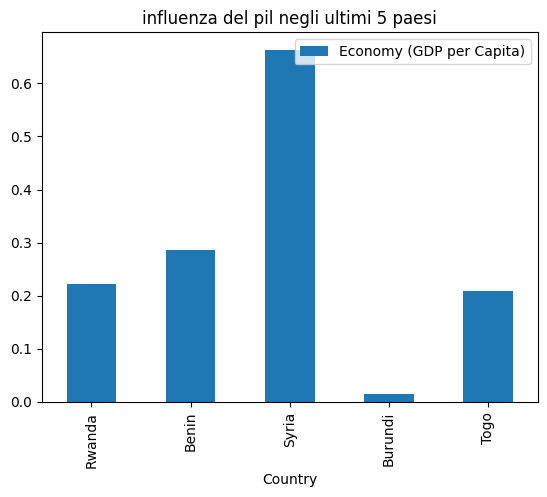

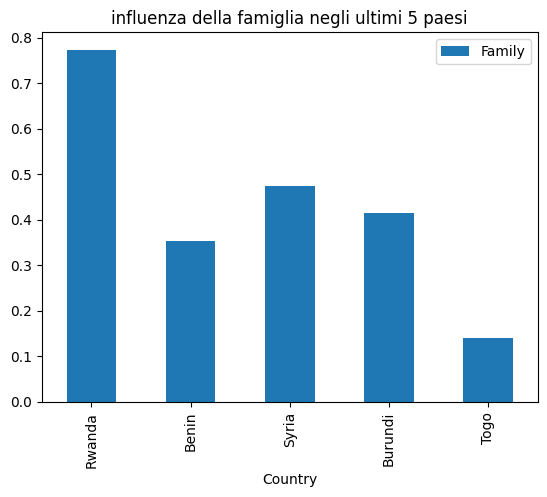

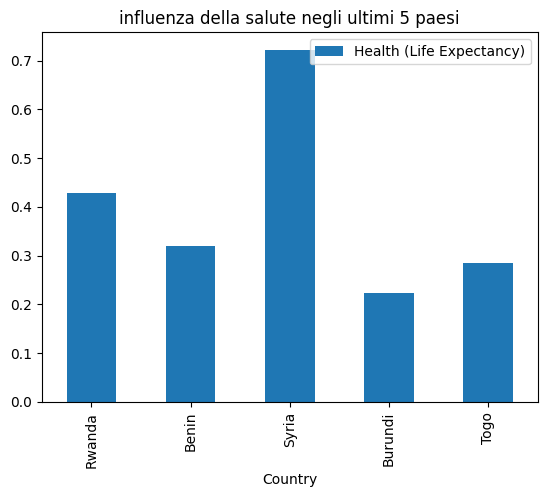

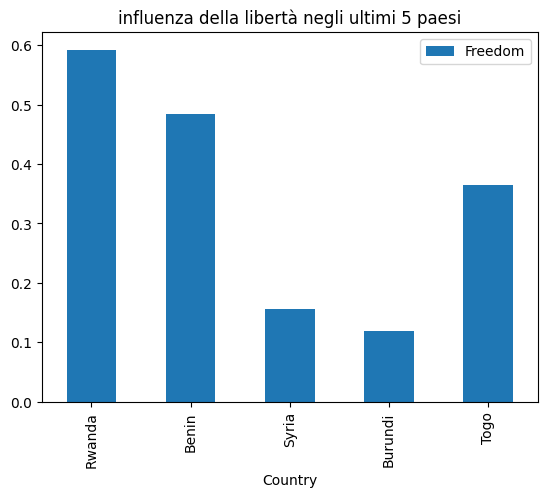

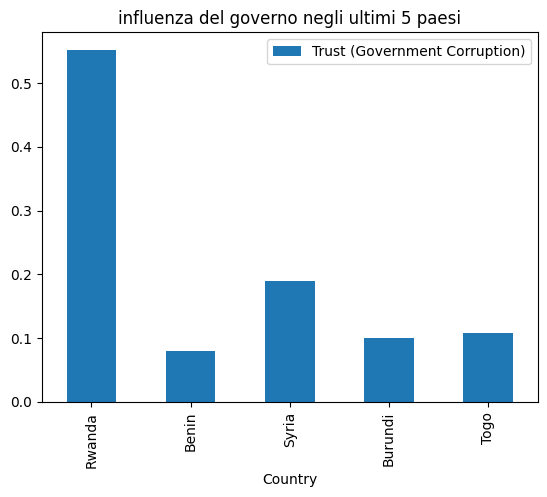

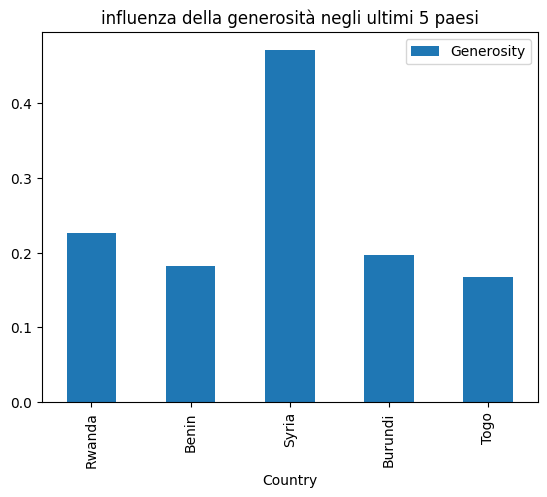

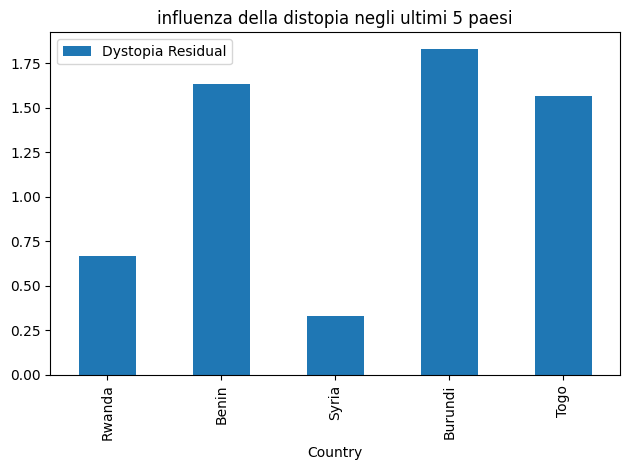

In [96]:
dl.tail(5).plot(x="Country", y="Economy (GDP per Capita)", kind="bar")
plt.title("influenza del pil negli ultimi 5 paesi")
dl.tail(5).plot(x="Country", y="Family", kind="bar")
plt.title("influenza della famiglia negli ultimi 5 paesi")
dl.tail(5).plot(x="Country", y="Health (Life Expectancy)", kind="bar")
plt.title("influenza della salute negli ultimi 5 paesi")
dl.tail(5).plot(x="Country", y="Freedom", kind="bar")
plt.title("influenza della libertà negli ultimi 5 paesi")
dl.tail(5).plot(x="Country", y="Trust (Government Corruption)", kind="bar")
plt.title("influenza del governo negli ultimi 5 paesi")
dl.tail(5).plot(x="Country", y="Generosity", kind="bar")
plt.title("influenza della generosità negli ultimi 5 paesi")
dl.tail(5).plot(x="Country", y="Dystopia Residual", kind="bar")
plt.title("influenza della distopia negli ultimi 5 paesi")
plt.tight_layout()

In [97]:
### Punteggi dei livelli di felicità nel mondo
px.scatter_geo(dl,locationmode='country names',locations='Country',color='Happiness Score'
                  ,hover_data=['Country','Health (Life Expectancy)','Economy (GDP per Capita)'],size='Happiness Score'
                  ,projection='natural earth',size_max=25,template='plotly_dark')

Text(0.5, 1.0, 'Le ultime 5 regioni per livelli di felicità ')

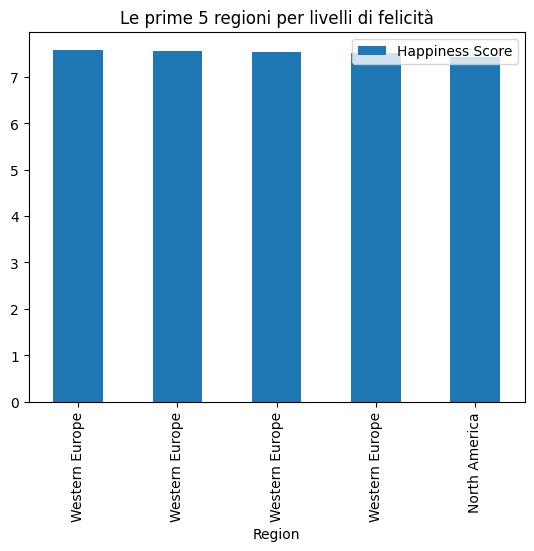

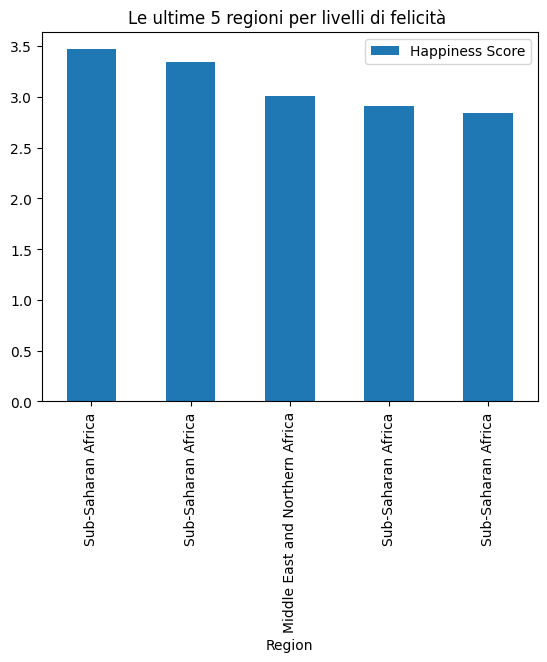

In [98]:
dl.head(5).plot(x="Region",y="Happiness Score",kind="bar")
plt.title("Le prime 5 regioni per livelli di felicità")
dl.tail(5).plot(x="Region",y="Happiness Score",kind="bar")
plt.title("Le ultime 5 regioni per livelli di felicità ")

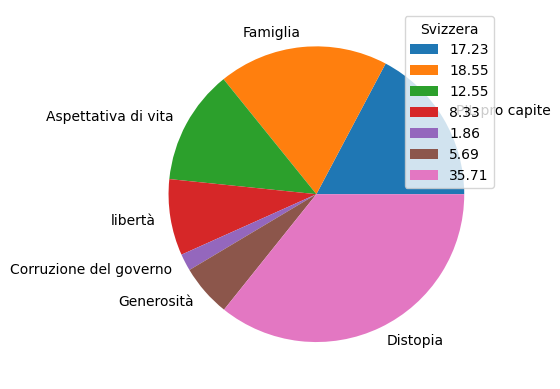

In [99]:
### I fattori che influenzano i livelli di felicità dei primi 5 paesi più nel dettaglio
plt.pie(x=percentuali,labels=nomi)
plt.legend(title="Svizzera",labels=percentuali)

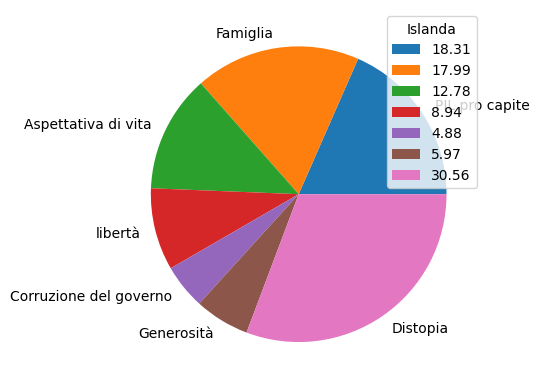

In [100]:
plt.pie(x=percentuali2,labels=nomi)
plt.legend(title="Islanda",labels=percentuali2)

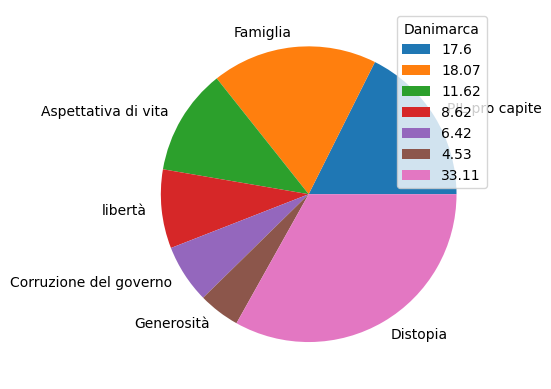

In [101]:
plt.pie(x=percentuali3,labels=nomi)
plt.legend(title="Danimarca",labels=percentuali3)

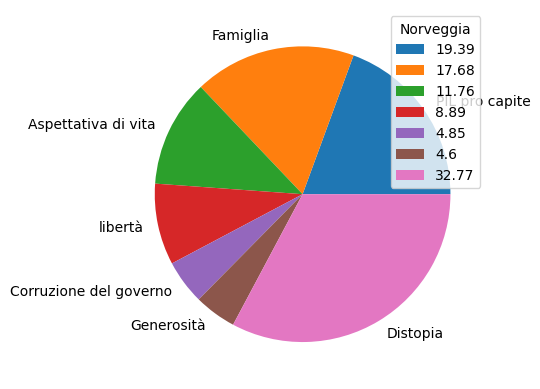

In [102]:
plt.pie(x=percentuali4,labels=nomi)
plt.legend(title="Norveggia",labels=percentuali4)

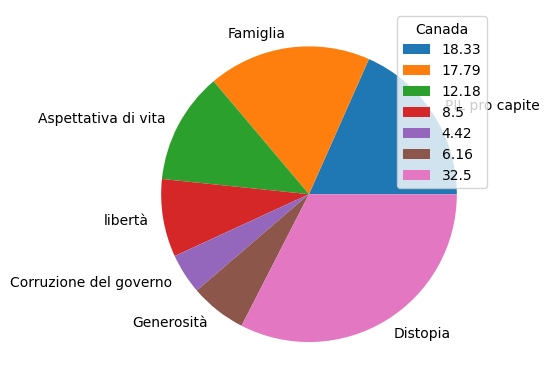

In [103]:
plt.pie(x=percentuali5,labels=nomi)
plt.legend(title="Canada",labels=percentuali5)

Text(0.5, 1.0, 'Stati con il maggiore livello di libertà umana nel 2015')

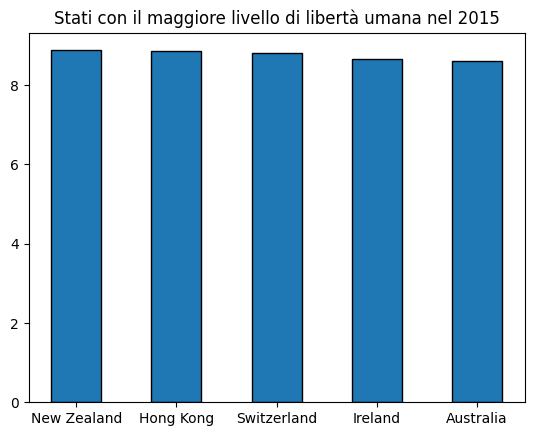

In [104]:
top_5= stati_felici[['countries','hf_score']].head(5)
bar_plot_data= pd.concat([top_5], keys=['5 happiest countries'])
plt.bar(x="countries",height="hf_score",data= bar_plot_data,width=0.5, edgecolor='black')
plt.title("Stati con il maggiore livello di libertà umana nel 2015")

In [105]:
### Punteggi di livertà umana nel mondo
px.scatter_geo(dlf,locationmode='country names',locations='countries',color='hf_score'
                  ,hover_data=['countries','pf_rol_procedural','pf_rol_civil'],size='hf_score'
                  ,projection='natural earth',size_max=25,template='plotly_dark')

Text(0.5, 1.0, 'Stati con il maggiore livello di libertà economica nel 2015')

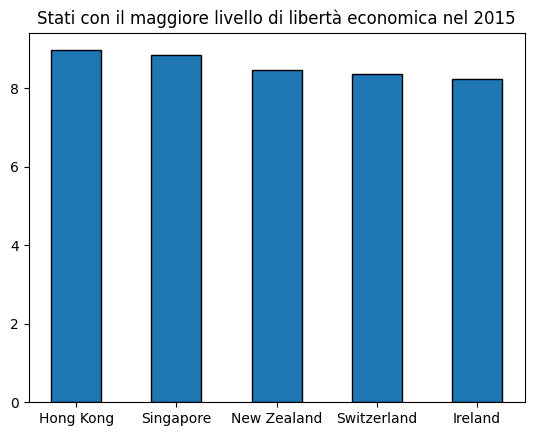

In [106]:
top_5= liberta_economica[['countries','ef_score']].head(5)
bar_plot_data= pd.concat([top_5], keys=['5 happiest countries'])
plt.bar(x="countries",height="ef_score",data= bar_plot_data,width=0.5, edgecolor='black')
plt.title("Stati con il maggiore livello di libertà economica nel 2015")

In [107]:
### Punteggi di libertà economica nel mondo
px.scatter_geo(dlf,locationmode='country names',locations='countries',color='ef_score'
                  ,hover_data=['countries','pf_rol_procedural','pf_rol_civil'],size='ef_score'
                  ,projection='natural earth',size_max=25,template='plotly_dark')

Text(0.5, 1.0, 'Stati con la media più alta di felicità, libertà economica e libertà umana')

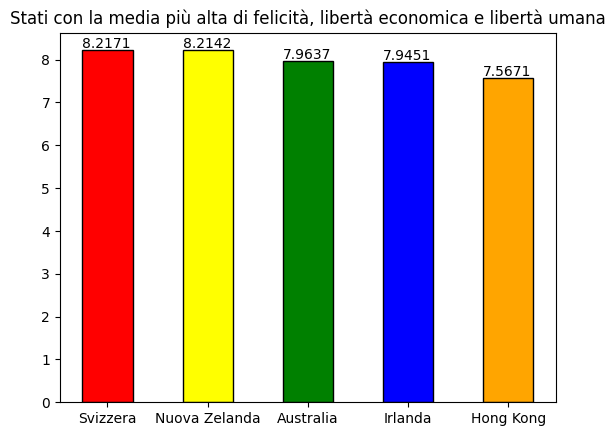

In [108]:
s_m = ["Svizzera","Nuova Zelanda","Australia","Irlanda","Hong Kong"]
c = ['red', 'yellow', 'green', 'blue', 'orange']
bars = plt.bar(x=s_m,height=sta_m,data=sta_m,width=0.5, edgecolor='black',color=c)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .05, yval)
plt.title("Stati con la media più alta di felicità, libertà economica e libertà umana")

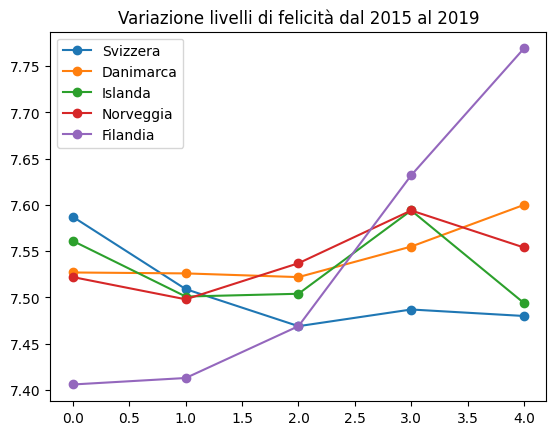

In [109]:
plt.plot(sviz_un,marker="o",label="Svizzera")
plt.plot(danimark_un,marker="o",label="Danimarca")
plt.plot(isl_un,marker="o",label="Islanda")
plt.plot(norv_un,marker="o",label="Norveggia")
plt.plot(finl_un,marker="o",label="Filandia")
plt.title("Variazione livelli di felicità dal 2015 al 2019")
plt.legend()

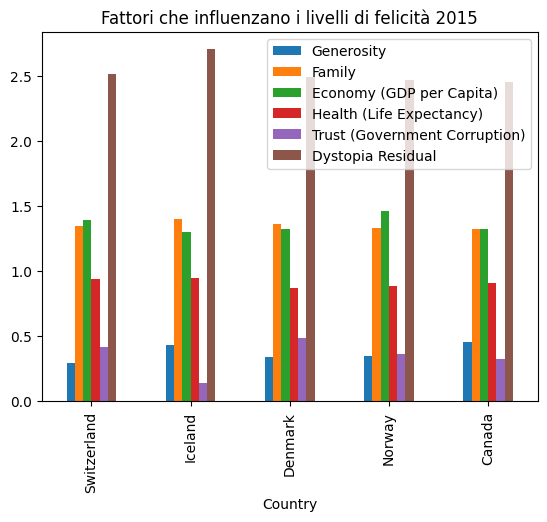

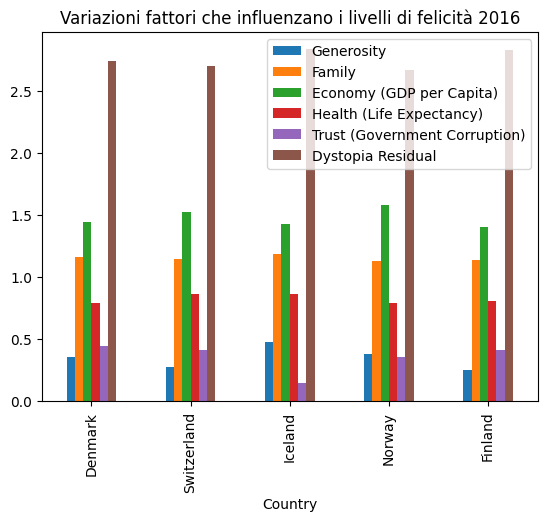

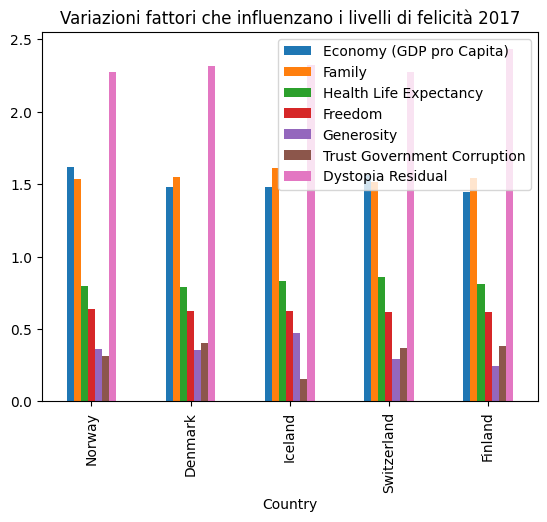

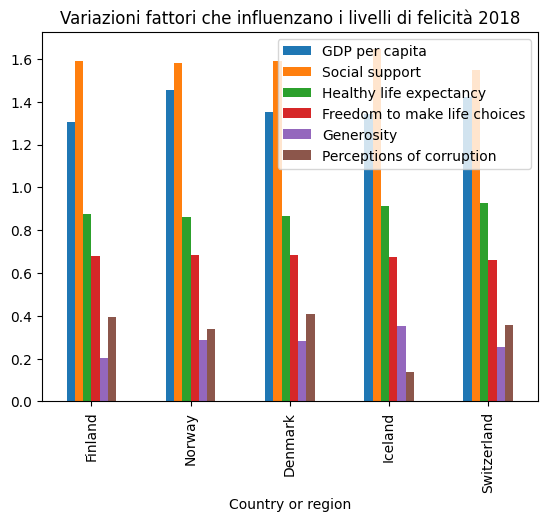

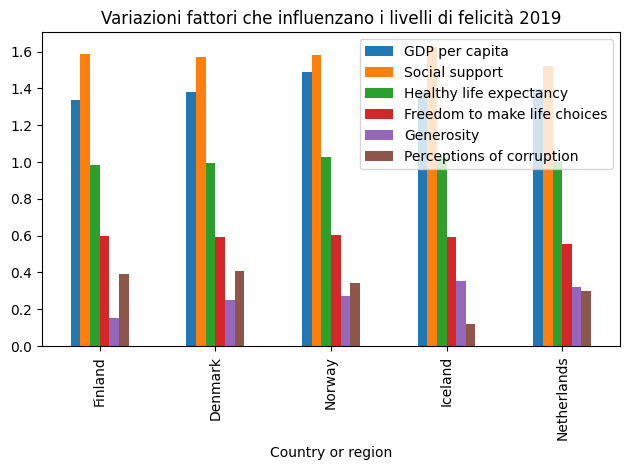

In [110]:
dlm = dl.head(5)
dlm.plot(x="Country", y=["Generosity","Family","Economy (GDP per Capita)","Health (Life Expectancy)","Trust (Government Corruption)","Dystopia Residual"], kind="bar")
plt.title("Fattori che influenzano i livelli di felicità 2015")
plt.legend()
dlm2016 = dl_2016.head(5)
dlm2016.plot(x="Country", y=["Generosity","Family","Economy (GDP per Capita)","Health (Life Expectancy)","Trust (Government Corruption)","Dystopia Residual"], kind="bar")
plt.title("Variazioni fattori che influenzano i livelli di felicità 2016")
plt.legend()
dlm2017 = dl_2017.head(5)
dlm2017.plot(x="Country", y=["Economy (GDP pro Capita)","Family","Health Life Expectancy","Freedom","Generosity","Trust Government Corruption","Dystopia Residual"], kind="bar")
plt.title("Variazioni fattori che influenzano i livelli di felicità 2017")
dlm2018 = dl_2018.head(5)
dlm2018.plot(x="Country or region", y=["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"], kind="bar")
plt.title("Variazioni fattori che influenzano i livelli di felicità 2018")
dlm2019 = dl_2019.head(5)
dlm2019.plot(x="Country or region", y=["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"], kind="bar")
plt.title("Variazioni fattori che influenzano i livelli di felicità 2019")
plt.tight_layout()

In [111]:
years = [2015,2016,2017,2018,2019]

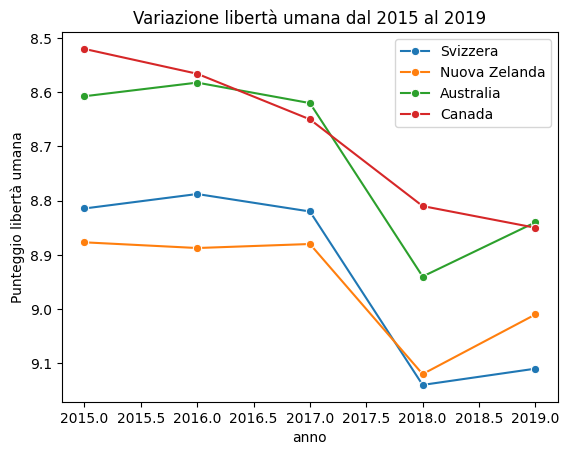

In [112]:
sns.lineplot(x=years, y=svizz_un,marker="o",label="Svizzera")
sns.lineplot(x=years, y=nuova_zell_un,marker="o",label="Nuova Zelanda")
sns.lineplot(x=years, y=austr_un,marker="o",label="Australia")
sns.lineplot(x=years, y=canad_un,marker="o",label="Canada")
plt.title("Variazione libertà umana dal 2015 al 2019")
plt.xlabel("anno")
plt.ylabel("Punteggio libertà umana")
plt.legend()

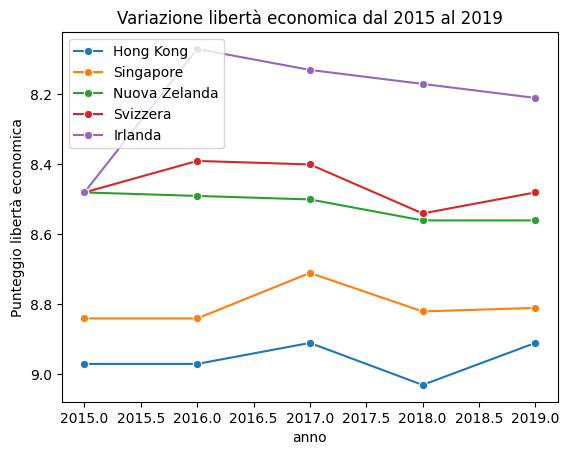

In [113]:
sns.lineplot(x=years, y=hongko_un,marker="o",label="Hong Kong")
sns.lineplot(x=years, y=sing_un,marker="o",label="Singapore")
sns.lineplot(x=years, y=nuova_ze_un,marker="o",label="Nuova Zelanda")
sns.lineplot(x=years, y=svi_un,marker="o",label="Svizzera")
sns.lineplot(x=years, y=irla_un,marker="o",label="Irlanda")
plt.title("Variazione libertà economica dal 2015 al 2019")
plt.xlabel("anno")
plt.ylabel("Punteggio libertà economica")
plt.legend()